In [1]:
import polars as pl
import seaborn as sns

## 1

In [2]:
df_tips = pl.from_pandas(
    sns.load_dataset("tips"),
    schema_overrides={"day": pl.String},
)
df_tips.head()

total_bill,tip,sex,smoker,day,time,size
f64,f64,cat,cat,str,cat,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4


<Axes: xlabel='day', ylabel='tip'>

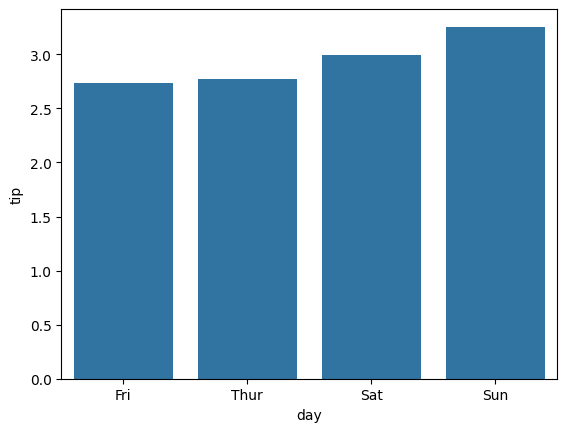

In [3]:
sns.barplot(
    data=df_tips.group_by("day").agg(pl.col("tip").mean()),
    x="day",
    y="tip",
)

## 2

In [4]:
df_flights = pl.from_pandas(
    sns.load_dataset("flights"),
)
df_flights.head(10)

year,month,passengers
i64,cat,i64
1949,"""Jan""",112
1949,"""Feb""",118
1949,"""Mar""",132
1949,"""Apr""",129
1949,"""May""",121
1949,"""Jun""",135
1949,"""Jul""",148
1949,"""Aug""",148
1949,"""Sep""",136


<Axes: xlabel='year', ylabel='passengers'>

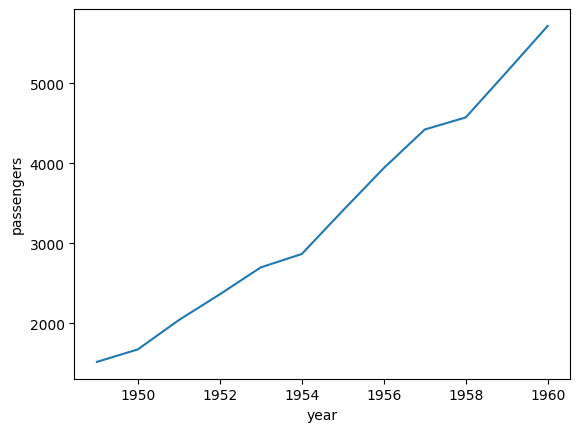

In [5]:
sns.lineplot(
    data=df_flights.group_by("year").agg(pl.col("passengers").sum()),
    x="year",
    y="passengers",
)

## 3

In [6]:
df_penguins = pl.from_pandas(
    sns.load_dataset("penguins"),
)
df_penguins.head(10)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
str,str,f64,f64,f64,f64,str
"""Adelie""","""Torgersen""",39.1,18.7,181.0,3750.0,"""Male"""
"""Adelie""","""Torgersen""",39.5,17.4,186.0,3800.0,"""Female"""
"""Adelie""","""Torgersen""",40.3,18.0,195.0,3250.0,"""Female"""
"""Adelie""","""Torgersen""",null,null,null,null,null
"""Adelie""","""Torgersen""",36.7,19.3,193.0,3450.0,"""Female"""
"""Adelie""","""Torgersen""",39.3,20.6,190.0,3650.0,"""Male"""
"""Adelie""","""Torgersen""",38.9,17.8,181.0,3625.0,"""Female"""
"""Adelie""","""Torgersen""",39.2,19.6,195.0,4675.0,"""Male"""
"""Adelie""","""Torgersen""",34.1,18.1,193.0,3475.0,null


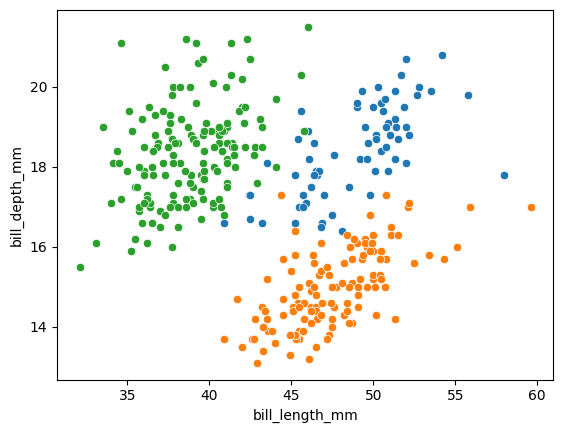

In [7]:
for species in df_penguins["species"].unique().to_list():
    sns.scatterplot(
        data=df_penguins.filter(pl.col("species") == species),
        x="bill_length_mm",
        y="bill_depth_mm",
    )

## 4

In [8]:
df_diamonds = pl.from_pandas(
    sns.load_dataset("diamonds"),
    schema_overrides={"cut": pl.String, "clarity": pl.String, "color": pl.String},
)
df_diamonds.head(10)

carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,i64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335,4.34,4.35,2.75
0.24,"""Very Good""","""J""","""VVS2""",62.8,57.0,336,3.94,3.96,2.48
0.24,"""Very Good""","""I""","""VVS1""",62.3,57.0,336,3.95,3.98,2.47
0.26,"""Very Good""","""H""","""SI1""",61.9,55.0,337,4.07,4.11,2.53
0.22,"""Fair""","""E""","""VS2""",65.1,61.0,337,3.87,3.78,2.49


<Axes: xlabel='cut', ylabel='price'>

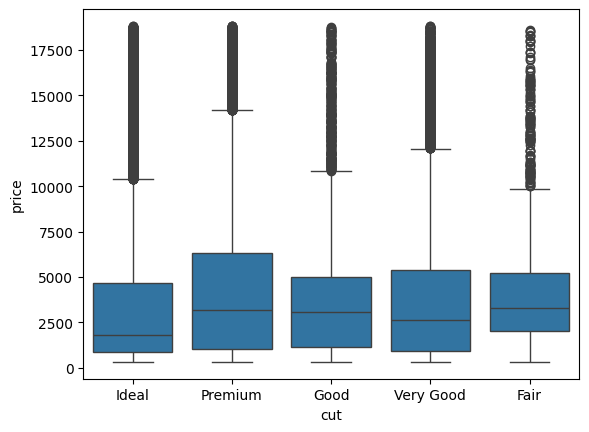

In [9]:
sns.boxplot(
    data=df_diamonds,
    x="cut",
    y="price",
)

<Axes: xlabel='carat', ylabel='price'>

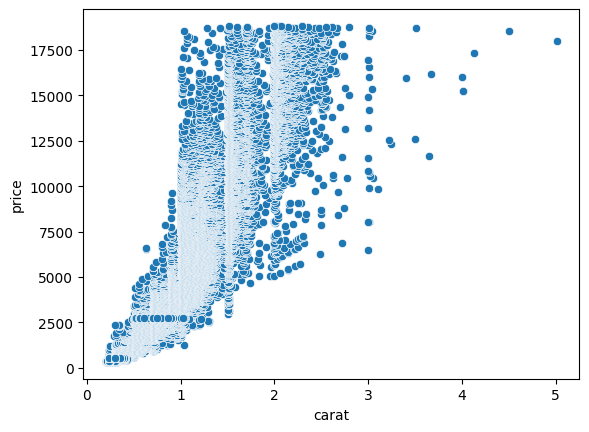

In [10]:
sns.scatterplot(
    data=df_diamonds,
    x="carat",
    y="price",
)

<Axes: xlabel='clarity', ylabel='count'>

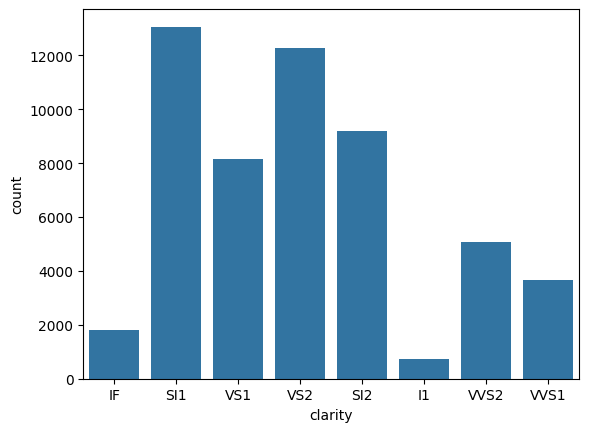

In [11]:
sns.barplot(
    data=df_diamonds.group_by("clarity").len("count"),
    x="clarity",
    y="count",
)

In [12]:
df_flights.pivot(on="month", index="year", values="passengers")

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
…,…,…,…,…,…,…,…,…,…,…,…,…
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


<Axes: >

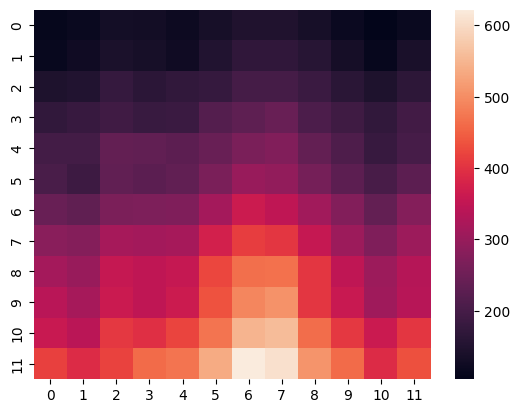

In [13]:
sns.heatmap(
    data=(
        df_flights
        .pivot(on="month", index="year", values="passengers")
        .drop("year")
    )
)